In [191]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Libreria para regresion logistica
from sklearn.linear_model import LinearRegression # Libreria para regresion Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
ruta = r'D:\PERSONAL\UNIVERSIDAD\INGENIERIA DE SISTEMAS\2024\2024-1\ÁNALISIS DE DATOS\TAREA 3\Guía de actividades y rúbrica de evaluación - Unidad 2 - Tarea 3 - Algoritmos de Aprendizaje Supervi\Anexo 2 - Dataset Vehicle\Car details v3_3.csv'

In [193]:
print (ruta)


D:\PERSONAL\UNIVERSIDAD\INGENIERIA DE SISTEMAS\2024\2024-1\ÁNALISIS DE DATOS\TAREA 3\Guía de actividades y rúbrica de evaluación - Unidad 2 - Tarea 3 - Algoritmos de Aprendizaje Supervi\Anexo 2 - Dataset Vehicle\Car details v3_3.csv


In [194]:
datos = pd.read_csv(ruta)

In [199]:
datos = datos.dropna()

In [200]:
datos.head(50)

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,2,2,1,23.40,1248,74.00,5
1,2014,370000,120000,2,2,2,21.14,1498,103.52,5
2,2006,158000,140000,4,2,3,17.70,1497,78.00,5
3,2010,225000,127000,2,2,1,23.00,1396,90.00,5
4,2007,130000,120000,4,2,1,16.10,1298,88.20,5
5,2017,440000,45000,4,2,1,20.14,1197,81.86,5
6,2007,96000,175000,3,2,1,17.30,1061,57.50,5
7,2001,45000,5000,4,2,2,16.10,796,37.00,4
8,2011,350000,90000,2,2,1,23.59,1364,67.10,5
9,2013,200000,169000,2,2,1,20.00,1399,68.10,5


In [201]:
datos.describe()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,2.888313,1.868328,1.447888,19.419861,1458.708829,187.553163,5.416393
std,3.863695,8.135827e+05,5.679230e+04,1.001478,0.338155,0.714451,4.036263,503.893057,3224.596897,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,2.000000,2.000000,1.000000,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,2.000000,2.000000,1.000000,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,4.000000,2.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,2.000000,6.000000,42.000000,3604.000000,108495.000000,14.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

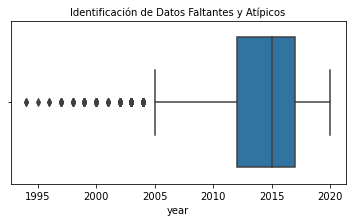

In [202]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

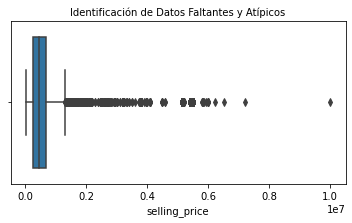

In [203]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [204]:

print("Cantidad de Registros con cero en year: ",datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en selling_price: ",datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en fuel: ",datos['fuel'].isin([0]).sum())
print("Cantidad de Registros con cero en transmission: ",datos['transmission'].isin([0]).sum())
print("Cantidad de Registros con cero en owner: ",datos['owner'].isin([0]).sum())
print("Cantidad de Registros con cero en mileage: ",datos['mileage'].isin([0]).sum())
print("Cantidad de Registros con cero en engine: ",datos['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en max_power: ",datos['max_power'].isin([0]).sum())
print("Cantidad de Registros con cero en seats: ",datos['seats'].isin([0]).sum())

Cantidad de Registros con cero en year:  0
Cantidad de Registros con cero en selling_price:  0
Cantidad de Registros con cero en fuel:  0
Cantidad de Registros con cero en transmission:  0
Cantidad de Registros con cero en owner:  0
Cantidad de Registros con cero en mileage:  17
Cantidad de Registros con cero en engine:  0
Cantidad de Registros con cero en max_power:  0
Cantidad de Registros con cero en seats:  0


In [205]:
# No se realizan cambios por que no se tienen campos en 0

In [206]:
#Conteo de Datos Atípicos

nivel_minimo=20000
nivel_maximo=4080000
Total_Atipicos=((datos['selling_price']<nivel_minimo)|(datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 130


In [207]:
# Filtra Datos Atípicos

datos=datos[(datos['selling_price']<nivel_maximo)&(datos['selling_price']>nivel_minimo)]

In [208]:
Total_Atipicos=((datos['selling_price']<nivel_minimo)|(datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [209]:
#Revision del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7776 entries, 0 to 7905
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7776 non-null   int64  
 1   selling_price  7776 non-null   int64  
 2   km_driven      7776 non-null   int64  
 3   fuel           7776 non-null   int64  
 4   transmission   7776 non-null   int64  
 5   owner          7776 non-null   int64  
 6   mileage        7776 non-null   float64
 7   engine         7776 non-null   int64  
 8   max_power      7776 non-null   float64
 9   seats          7776 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 668.2 KB


In [210]:
# Total de precios de vehiculos por grupos

datos['selling_price'].value_counts()

300000     221
600000     211
350000     204
550000     204
450000     194
          ... 
905000       1
1145000      1
1625000      1
531000       1
746000       1
Name: selling_price, Length: 653, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento
X = datos.drop('selling_price', axis=1)  # Se cargan los datos de train sin los datos de la columna selling price
Y = datos['selling_price']  # Se cargan los datos de train con los datos de la la columna selling price

# La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [212]:
print (X_train)

      year  km_driven  fuel  transmission  owner  mileage  engine  max_power  \
6394  2015     110000     2             2      1    14.10    2179     147.94   
5756  2015      40000     2             1      1    18.49    1493     100.00   
7359  2016      35000     4             2      2    21.40    1197      83.10   
4323  2006      74000     2             2      1    13.70    1948      68.00   
2712  2017      12000     4             2      1    17.50    1199      88.70   
...    ...        ...   ...           ...    ...      ...     ...        ...   
5021  2007     120000     2             2      3    14.60    2956      63.00   
3320  2016      11000     4             1      1    14.30    1598     103.50   
1688  2009      80000     2             2      3    12.05    2179     120.00   
2652  2014      60000     2             2      2    23.00    1248      88.70   
2777  2018      28000     4             1      1    21.21    1197      81.80   

      seats  
6394      7  
5756      7

In [216]:
print (Y_train)

6394    503000
5756    700000
7359    650000
4323    130000
2712    819999
         ...  
5021    100000
3320    645000
1688    320000
2652    280000
2777    680000
Name: selling_price, Length: 5832, dtype: int64


In [214]:
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()


In [215]:
modelo_regresion.fit (X_train , Y_train) 

LinearRegression()

In [218]:
prediccion = modelo_regresion.predict(X_test)

In [219]:
print(Y_test)

5530    1000000
5269     220000
6645     400000
2752     875000
5921     245000
         ...   
2021     170000
2814     200000
3695     300000
5173    1525000
6757     640000
Name: selling_price, Length: 1944, dtype: int64


In [220]:
print (prediccion)

[ 653332.42383498  134587.34142543  207945.33452734 ...  244186.07658607
 1033711.17402063  594443.82692392]


In [224]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_test, prediccion)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 108050406977.52933


In [228]:
import numpy as np

# Verificar las dimensiones de X_train y Y_train
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de Y_train:", Y_train.shape)

# Verificar el número de elementos en X_train y Y_train
num_elementos_X_train = X_train.shape[0]
num_elementos_Y_train = Y_train.shape[0]

if num_elementos_X_train == num_elementos_Y_train:
    print("X_train y Y_train tienen el mismo número de elementos.")
else:
    print("X_train y Y_train tienen diferente número de elementos.")


Dimensiones de X_train: (5832, 9)
Dimensiones de Y_train: (5832,)
X_train y Y_train tienen el mismo número de elementos.


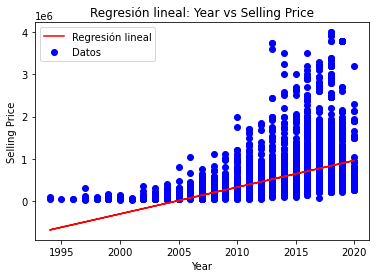

In [237]:

# Selecciona las columnas 'year' y 'selling_price'
datos_seleccionados = datos[['year', 'selling_price']]

# Separa las características (X) y las etiquetas (Y)
X = datos_seleccionados[['year']]
Y = datos_seleccionados['selling_price']
plt.scatter(X, Y, color='blue', label='Datos') # Grafica los datos de dispersión
# Grafica la línea de regresión
plt.plot(X, modelo_regresion.predict(X), color='red', label='Regresión lineal') # Grafica la línea de regresión
plt.xlabel('Year') # Agrega etiquetas y título al gráfico
plt.ylabel('Selling Price')
plt.title('Regresión lineal: Year vs Selling Price')
plt.legend()

# Muestra el gráfico
plt.show()


In [233]:
# Obtener la pendiente (m) y la intersección (b) del modelo de regresión lineal
pendiente = modelo_regresion.coef_[0]
interseccion = modelo_regresion.intercept_

# Imprimir la ecuación de la forma y = mx + b
print(f"Ecuación de regresión lineal: Selling price = {pendiente:.2f} year + {interseccion:.2f}")


Ecuación de regresión lineal: Selling price = 63312.77 year + -126934732.82
